# Retrieving the Dataset

In [1]:
# claiming the dataset
import pandas as pd

cxr_dataset = pd.read_csv("features.csv")
cxr_dataset.head()

,Unnamed: 0,mean0,variance0,skewness0,uniformity0,snr0,mean1,variance1,skewness1,uniformity1,...,variance14,skewness14,uniformity14,snr14,mean15,variance15,skewness15,uniformity15,snr15,label
0,0,70.462942,1910.214419,0.142911,153,1.612203,68.762392,1379.803495,0.124528,149,...,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0,0.000000,COVID-19
1,1,66.955882,1598.634243,0.182293,154,1.674612,61.542641,1482.089997,0.413032,149,...,0.0,0.0,0,0.0,126.012526,55.553079,0.253703,35,16.906731,COVID-19
2,2,69.278997,1250.093007,0.241750,142,1.959433,52.035330,1240.863575,0.599047,146,...,0.0,0.0,0,0.0,129.889952,34.920904,-0.180043,23,21.980260,COVID-19
3,3,84.875491,1128.756450,-0.566774,130,2.526284,85.095681,936.183536,-0.282511,135,...,0.0,0.0,0,0.0,106.054614,219.558223,-0.200348,59,7.157391,COVID-19
4,4,96.884400,1320.239837,-0.538272,164,2.666413,102.449074,1402.357592,-0.317881,152,...,0.0,0.0,0,0.0,122.054715,471.464992,-0.279372,88,5.621210,COVID-19


# Splitting the dataset to train and test

In [2]:
# Getting the features needed

#get the feature columns
col_features = list(cxr_dataset.columns)
#get the label column
label = list(cxr_dataset.columns).pop()
#deleting label column from col
del col_features[0]
del col_features[len(col_features) - 1]

features = cxr_dataset.loc[:, col_features].values
labels = cxr_dataset.loc[:, label].values

display(pd.DataFrame(features))

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,70.462942,1910.214419,0.142911,153.0,1.612203,68.762392,1379.803495,0.124528,149.0,1.851153,...,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,66.955882,1598.634243,0.182293,154.0,1.674612,61.542641,1482.089997,0.413032,149.0,1.598596,...,0.000,0.000000,0.000000,0.0,0.000000,126.012526,55.553079,0.253703,35.0,16.906731
2,69.278997,1250.093007,0.241750,142.0,1.959433,52.035330,1240.863575,0.599047,146.0,1.477190,...,0.000,0.000000,0.000000,0.0,0.000000,129.889952,34.920904,-0.180043,23.0,21.980260
3,84.875491,1128.756450,-0.566774,130.0,2.526284,85.095681,936.183536,-0.282511,135.0,2.781167,...,0.000,0.000000,0.000000,0.0,0.000000,106.054614,219.558223,-0.200348,59.0,7.157391
4,96.884400,1320.239837,-0.538272,164.0,2.666413,102.449074,1402.357592,-0.317881,152.0,2.735764,...,0.000,0.000000,0.000000,0.0,0.000000,122.054715,471.464992,-0.279372,88.0,5.621210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,66.180685,590.338069,0.142523,99.0,2.723835,57.669341,1018.175478,-0.079244,124.0,1.807314,...,108.375,16.234375,0.230214,6.0,26.897463,45.918757,1183.157079,0.498012,116.0,1.334962
296,57.244511,1158.863368,0.426454,135.0,1.681581,55.032396,1202.002007,0.293633,131.0,1.587325,...,0.000,0.000000,0.000000,0.0,0.000000,108.641026,385.307035,-1.878648,39.0,5.534653
297,52.456882,983.327743,0.309332,119.0,1.672836,57.834487,888.014705,0.156113,129.0,1.940782,...,114.000,6.947368,-0.569090,10.0,43.250854,96.843924,356.423801,0.518259,99.0,5.129665
298,85.323478,864.467536,-0.549943,112.0,2.901979,57.034525,1182.690958,0.153338,121.0,1.658449,...,0.000,0.000000,0.000000,0.0,0.000000,79.000000,991.569231,-0.586822,94.0,2.508797


In [3]:
from sklearn.model_selection import train_test_split

# Separating test and train dataset
train_features, test_features, train_lbl, test_lbl = train_test_split( features, labels, test_size=0.2, random_state=0)

In [4]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting of training dataset only
scaler.fit(train_features)

# Apply transform to both the training set and the test set.
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# Applying Principal Component Analysis

In [5]:
# Feeding it to Principal Component Analysis
from sklearn.decomposition import PCA

# 5 different variance
variances = ["100%", "99%", "95%", "90%", "85%"]
pca = [PCA(), PCA(.99), PCA(.95), PCA(.90), PCA(.85)]
# results of each PCA variance
pca_fit = []

for p in pca:
    pca_content = {"fit": None, "transforms": {"train": None, "test": None}}
    pca_content["fit"] = p.fit(train_features)
    pca_content["transforms"]["train"] = p.transform(train_features)
    pca_content["transforms"]["test"] = p.transform(test_features)
    pca_fit.append(pca_content)

In [6]:
# checking the number of Principal Component
print("From 80 features")
for i in range(len(variances)):
    print(f"Principal Components with {variances[i]} variance:", pca_fit[i]["fit"].n_components_)

From 80 features
Principal Components with 100% variance: 80
Principal Components with 99% variance: 59
Principal Components with 95% variance: 40
Principal Components with 90% variance: 31
Principal Components with 85% variance: 25


# Applying Linear Discriminant Analysis

### Libraries Needed

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

import numpy as np

lda = LinearDiscriminantAnalysis()

### With Principal Component Analysis

In [8]:
# Evaluating of Model
for i in range(len(pca_fit)):
    # define model evaluation method
    cv = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(lda, pca_fit[i]["transforms"]["train"], np.ravel(train_lbl), scoring='accuracy', cv=cv)
    # summarize result
    print('Accuracies:', scores)
    print('Variance of %s:\nMean Accuracy: %.4f (%.4f)\n' % (variances[i], np.mean(scores), np.std(scores)))
    print('------------------------------------------------')

Accuracies: [0.41666667 0.58333333 0.41666667 0.5        0.66666667 0.58333333
 0.58333333 0.41666667 0.41666667 0.66666667 0.41666667 0.83333333
 0.5        0.58333333 0.58333333 0.5        0.58333333 0.91666667
 0.41666667 0.66666667]
Variance of 100%:
Mean Accuracy: 0.5625 (0.1366)

------------------------------------------------
Accuracies: [0.58333333 0.66666667 0.41666667 0.33333333 0.66666667 0.66666667
 0.58333333 0.41666667 0.41666667 0.58333333 0.33333333 0.75
 0.58333333 0.58333333 0.58333333 0.5        0.66666667 0.83333333
 0.5        0.58333333]
Variance of 99%:
Mean Accuracy: 0.5625 (0.1288)

------------------------------------------------
Accuracies: [0.58333333 0.58333333 0.5        0.41666667 0.58333333 0.58333333
 0.5        0.33333333 0.58333333 0.58333333 0.41666667 0.58333333
 0.66666667 0.75       0.58333333 0.41666667 0.58333333 0.83333333
 0.5        0.5       ]
Variance of 95%:
Mean Accuracy: 0.5542 (0.1127)

------------------------------------------------


In [9]:
#Train the model
results = [] # where all the results will place

for i in range(len(pca_fit)):
    lda.fit(pca_fit[i]["transforms"]["train"], np.ravel(train_lbl))
    predictions = lda.predict(pca_fit[i]["transforms"]["test"])
    results.append(predictions)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for i in range(len(pca_fit)):
    print("Variance of", variances[i])
    print("Accuracy Score -", accuracy_score(test_lbl, results[i]))
    
    print("Confusion Matrix")
    print(confusion_matrix(test_lbl, results[i]))
    
    print("Classification Report")
    print(classification_report(test_lbl, results[i]))
    
    print()

Variance of 100%
Accuracy Score - 0.65
Confusion Matrix
[[11  1  8]
 [ 1 19  0]
 [ 8  3  9]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.55      0.55      0.55        20
  No Finding       0.83      0.95      0.88        20
   Pneumonia       0.53      0.45      0.49        20

    accuracy                           0.65        60
   macro avg       0.64      0.65      0.64        60
weighted avg       0.64      0.65      0.64        60


Variance of 99%
Accuracy Score - 0.65
Confusion Matrix
[[13  1  6]
 [ 2 17  1]
 [ 4  7  9]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.68      0.65      0.67        20
  No Finding       0.68      0.85      0.76        20
   Pneumonia       0.56      0.45      0.50        20

    accuracy                           0.65        60
   macro avg       0.64      0.65      0.64        60
weighted avg       0.64      0.65      0.64        60


Varianc

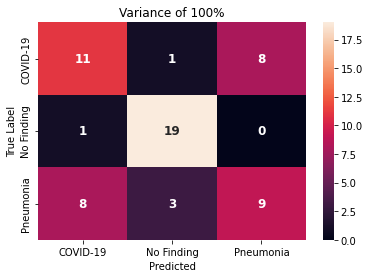

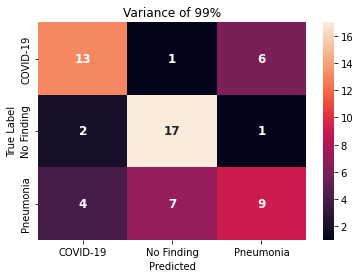

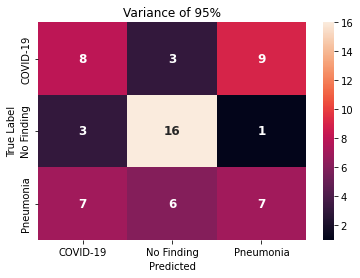

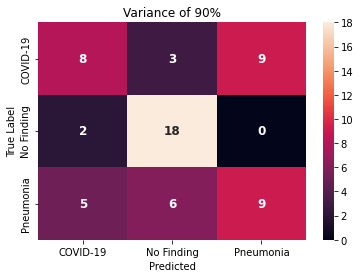

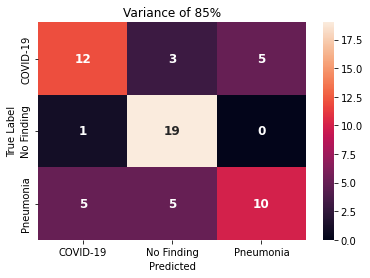

In [11]:
#Display Confusion Matrix
#Credits: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


for conf_idx in range(len(results)):
    conf_matrix = confusion_matrix(test_lbl, results[conf_idx])
    df_cm = pd.DataFrame(
        conf_matrix, index=['COVID-19', 'No Finding', 'Pneumonia'], columns=['COVID-19', 'No Finding', 'Pneumonia'], 
    )
    
    heatmap = sns.heatmap(df_cm, annot=True, fmt='d', annot_kws={"fontsize": 12, "fontweight": 'bold'})
    
    plt.title(f"Variance of {variances[conf_idx]}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted")
    plt.show()

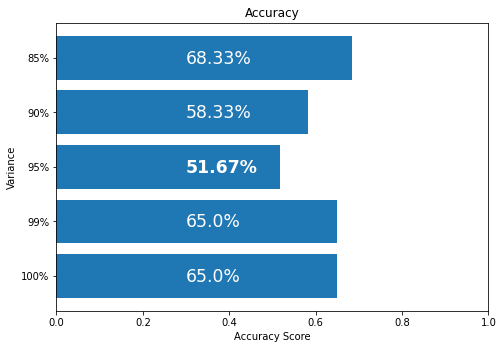

In [12]:
# For Accuracy, Precision, 
accuracies = []
threshold = -0.1

fig = plt.figure()
ax = fig.add_axes([0,1,1,1])

for i in range(len(results)):
    accuracies.append(accuracy_score(test_lbl, results[i]))
    if(i != 2):
        ax.text(0.3, threshold, str(round(accuracies[i]*100, 2)) + '%', color='white', fontsize="xx-large")
    else:
        ax.text(0.3, threshold, str(round(accuracies[i]*100, 2)) + '%', color='white', fontweight="bold", fontsize="xx-large")
    threshold = threshold + 1
    
ax.barh(variances, accuracies)
ax.set(xlim=[0, 1])
ax.set_ylabel('Variance')
ax.set_xlabel('Accuracy Score')
plt.title("Accuracy")
plt.show()

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

def getBarH(results, title="Precision", score_method='precision'):
    classes = ['COVID-19', 'Pneumonia', 'No Finding']
    variances = ["100%", "99%", "95%", "90%", "85%"]
    
    for i in range(len(variances)):
        #Set up the figure
        fig = plt.figure()
        ax = fig.add_axes([0,1,1,1])
        
        if(score_method == 'precision'):
            score = precision_score(test_lbl, results[i], average=None)
        elif (score_method == 'recall'):
            score = recall_score(test_lbl, results[i], average=None)
        else:
            score = f1_score(test_lbl, results[i], average=None)

        ax.text(0.2, -0.05, str(round(precisions[0]*100, 2)) + '%', color='white', fontsize="xx-large")
        ax.text(0.2, 0.95, str(round(precisions[1]*100, 2)) + '%', color='white', fontsize="xx-large")
        ax.text(0.2, 1.95, str(round(precisions[2]*100, 2)) + '%', color='white', fontsize="xx-large")

        ax.barh(classes, precisions)
        ax.set(xlim=[0, 1])
        ax.set_ylabel('Classes')
        ax.set_xlabel(f'{title} Score')
        plt.title(f"{title} from Variance {variances[i]}")
        plt.show()

In [14]:
# saving model as a pickle
import pickle

pickle.dump(lda_train, open("lda-model.sav", "wb"))
pickle.dump(scaler ,open("scaler.sav", "wb"))

NameError: name 'lda_train' is not defined

In [ ]:
import collections, numpy
print(collections.Counter(results[0]))
print(collections.Counter(test_lbl))